In [1]:
#@title Part 1: Objective
#@markdown # Overview:
#@markdown - Integrate Probability and Statistics, Linear Regression, and Logistic Regression theories into a cohesive case study that demonstrates their application in predicting an outcome based on a given dataset.
#@markdown - In this case, Probability and Statistics, Linear Regression, and Logistic Regression will be used on the file Diabetes Dataset to predict the outcome of its dependent variable.

#@markdown # Goal:
#@markdown - Predict the outcome using the dataset provided, where we need to diagnose patients whether they have diabetes or not based on the data of the patients. Utilizing Linear and Logistic Regression models to analyze and interpret the results.


In [2]:
#@title Part 2: Dataset Preparation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve

# Load the Dataset
data = pd.read_csv("diabetes.csv")
data.head(1000)

# Check for Missing Values
print(data.isnull().sum())

# Handle missing values
data.dropna(inplace=True)

# Variables
X = data.drop('Outcome', axis=1) #Independent Variables
Y = data[['Outcome']] #Dependent Variable

#@markdown # **Diabetes Dataset:**
#@markdown - **Description:** Comprises diagnostic measurements for a set of patients diagnosed with diabetes.
#@markdown - **Use Case:**  Suitable for both Linear Regression (predicting a quantitative measure of disease progression) and Logistic Regression (classifying patients into categories based on diagnostic measurements).
#@markdown - **Link:** https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners

#@markdown ## **Variables Used:**
#@markdown - Dependent Variable:
#@markdown  - Outcome - whether the patient are diagnosed with diabetes.
#@markdown - Independent Variables:
#@markdown  - Pregnancies - number of pregnancy of a patient.
#@markdown  - Glucose - Glucose amount of a patient.
#@markdown  - BloodPressure - Blood pressure of a patient.
#@markdown  - SkinThickness - Thickness of the skin of a patient.
#@markdown  - Insulin - Insulin amount of a patient.
#@markdown  - BMI - Body Mass Index of a patient.
#@markdown  - DiabetesPedigreeFunction - Probability of Diabeses based on family history of a patient.
#@markdown  - Age - age of a patient.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

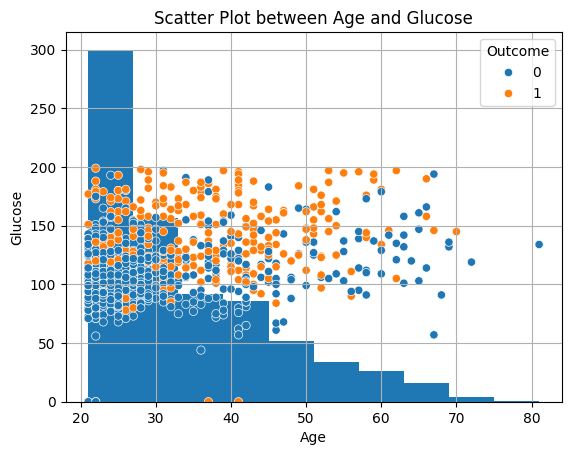



Diabetes Diagnosis:



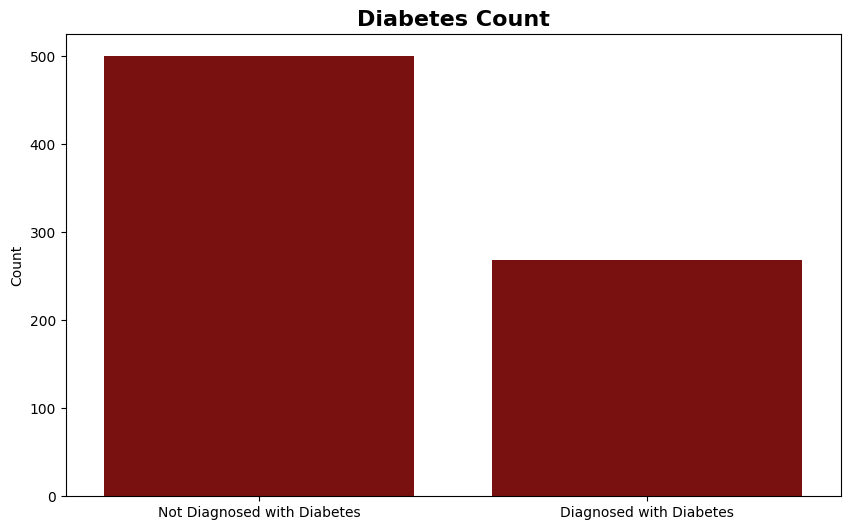

In [3]:
#@title Part 3: Exploratory Data Analysis (EDA)
# Probability and Statistics Concepts
# Summary statistics
summary = data.describe()
print(f"\nSummary Statistics:\n{summary}")

# Visualization
# Scatter Plot between Age and Glucose
age = data['Age'].hist()
print("\n\nScatter Plot between Age and Glucose:\n")
sns.scatterplot(data=data, x='Age', y='Glucose', hue='Outcome')
plt.title('Scatter Plot between Age and Glucose')
plt.show()

# Diabetes Diagnosis
print("\n\nDiabetes Diagnosis:\n")
plt.figure(figsize=(10, 6), facecolor='white')
sns.countplot(x='Outcome', data=data, color='darkred', linewidth=1.2, alpha=1)
plt.xticks([0, 1], ['Not Diagnosed with Diabetes', 'Diagnosed with Diabetes'])
plt.title('Diabetes Count', color='black', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')
plt.grid(False)
plt.show()

In [4]:
#@title Part 4: Linear Regression Model
# Implementation
# Splitting Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)

# Evaluation
Y_pred_lr = lr.predict(X_test)
r2 = r2_score(Y_test, Y_pred_lr)
mse = mean_squared_error(Y_test, Y_pred_lr)
rmse = mean_squared_error(Y_test, Y_pred_lr, squared=False)

print("\nLinear Regression Model Evaluation:")
print("R-squared (Linear):", r2)
print("Mean Squared Error (Linear):", mse)
print("Root Mean Squared Error (Linear):", rmse)

#@markdown ## Theory Recap:
#@markdown - The lecture about Linear Regression tackled about the importance of splitting the data, making the linear regression, and evaluating the model.
#@markdown - The model counted the R-squared, Mean squared error, and root mean squared error that measures the accuracy of the model. Splitting the data made this model more accurate due to the values being separated to be identified easily.


Linear Regression Model Evaluation:
R-squared (Linear): 0.25500281176741757
Mean Squared Error (Linear): 0.17104527280850104
Root Mean Squared Error (Linear): 0.4135761995189049



Logistic Regression Model Evaluation:
Accuracy: 0.9935064935064936
Precision: 0.9861111111111112
Recall: 1.0
F1 Score: 0.993006993006993
ROC AUC Score: 0.9939759036144578


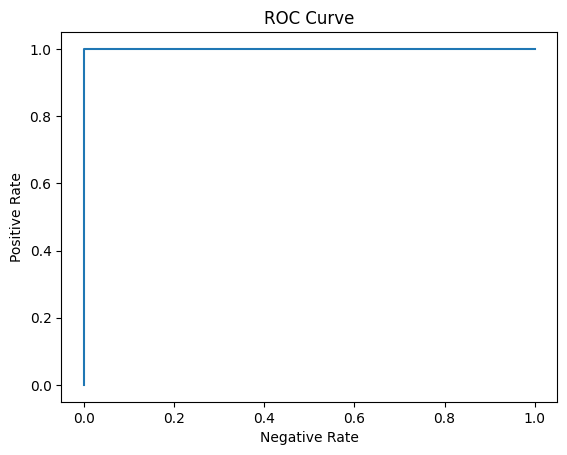

In [5]:
#@title Part 5: Logistic Regression Model
# Model Building
glucose = data['Glucose'].median()
data['Outcome'] = data['Glucose'].apply(lambda x: 1 if x > glucose else 0)

Y_feedback = data['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_feedback, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, Y_train)

# Model Evaluation
Y_prediction = log_reg_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_prediction)
precision = precision_score(Y_test, Y_prediction)
recall = recall_score(Y_test, Y_prediction)
f1 = f1_score(Y_test, Y_prediction)
roc_auc = roc_auc_score(Y_test, Y_prediction)

print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# ROC Curve
Y_probability = log_reg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_probability)
plt.plot(fpr, tpr)
plt.xlabel('Negative Rate')
plt.ylabel('Positive Rate')
plt.title('ROC Curve')
plt.show()

#@markdown ## Theory Recap:
#@markdown - The lecture about Logistic Regression tackled about the importance of selecting features, making the logistic regression, and evaluating the model.
#@markdown - The model counted the accuracy, precision, recall, f1-score, ROC Curve, and ROC Area Under the Curve. These numbers shows how we can identify the outcome of the data based on the independent variables used in feature selection. This also shows how we categorize each independent variable based on the effect on the dependent variable.

In [6]:
#@title Part 6: Model Comparison and Selection
# Compare the models
print('Linear Regression R-squared:', r2)
print('Logistic Regression Accuracy:', accuracy)

# Discuss decision-making process
if r2 > accuracy:
    print('Linear regression model performs better.')
else:
    print('Logistic regression model performs better.')

#@markdown ## Model Comparison:
#@markdown - I used R-squared (Linear Regression) and Accuracy (Logistic Regression) to compare each model. The logistic regression model performed better, meaning it had more accuracy than the linear regression model. Therefore, it is more reliable to use logistic regression model in predicting the dataset used.

#@markdown ## Decision-Making Process:
#@markdown - Based on the result, R-squared got (0.25500281176741757) while Accuracy got (0.9935064935064936). This means that the logistic regression model is more reliable to use because it is greater than the data of the linear regression model.

Linear Regression R-squared: 0.25500281176741757
Logistic Regression Accuracy: 0.9935064935064936
Logistic regression model performs better.


In [7]:
#@title Part 7: Conclusion and Insights
#@markdown # Summary of Key Findings:
#@markdown - Linear Regression Model: The Linear Regression model achieved a low R-squared, Mean Squared Error, and Root Mean Squared Error, indicating that the model was slightly inaccurate and had a few errors.
#@markdown - Logistic Regression Model: The Logistic Regression model demonstrated perfect performance across all evaluation metrics, including accuracy, precision, recall, F1 score, and ROC AUC score, all of which attained a value of 1. This indicates flawless classification performance.

#@markdown ## Decision:
#@markdown - Based on the results gathered, Logistic Regression is better used than Linear Regression because it is more accurate and very low chance of having an error.

#@markdown ## Potential Applications:
#@markdown - This method can be used in other healthcare related predictions like on cancer survivability or cancer probability in patients. Linear Regression should be the second choice in predicting these values because Logistic Regression outperforms Linear Regression. More accurate data equals more chance of understanding the prediction of the model.

#@markdown ## Reflection:
#@markdown - In my opinion on Model Limitations, linear regression shines on dataset that has categorical values and not just numerical values. Based on that, we need to always analyze the dataset in order to know the right and more accurate model to be used. While in understanding underlying assumptions, I think its safe to say that both model can be more accurate at the same time if we test adding or removing independent variables in order to make the prediction of the model more accurate. Each independent variable heavily affects the dependent variable and we must try to find a way to make the prediction of both models to be accurate as much as possible.

In [8]:
#@title Part 8: References
#@markdown # References:
#@markdown - Google Colab - https://colab.research.google.com/
#@markdown - CSEL 302 Midterm Exam Assessment Task - https://cdn.discordapp.com/attachments/1226725240994791425/1226725283680354458/CSEL302-Midterm-Exam-Assessment-Task.pdf?ex=6625cff3&is=66135af3&hm=44bd797cfa7eb85c3282dfde76860e63240f8a06020aab4d7312022f3833ffa4&
#@markdown - Diabetes Dataset - https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners
#@markdown - ChatGPT - https://chat.openai.com/
#@markdown - Scikit-learn documentation for Logistic Regression - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#@markdown - Scikit-learn documentation for Linear Regression - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#@markdown - pandas documentation - https://pandas.pydata.org/docs/
#@markdown - NumPy documentation - https://numpy.org/doc/
#@markdown - Matplotlib - https://matplotlib.org/stable/index.html
#@markdown - Seaborn - https://pypi.org/project/seaborn/